UK Revenue %: 82.98%
Non-UK Revenue %: 17.02%


C:\Users\Acer\AppData\Local\Temp\ipykernel_10408\2791008038.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


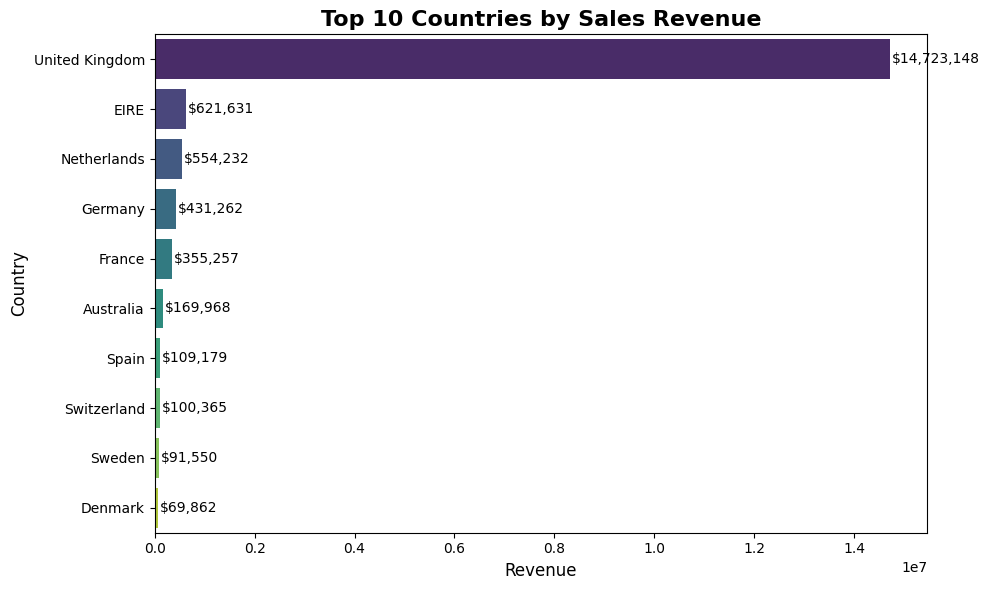

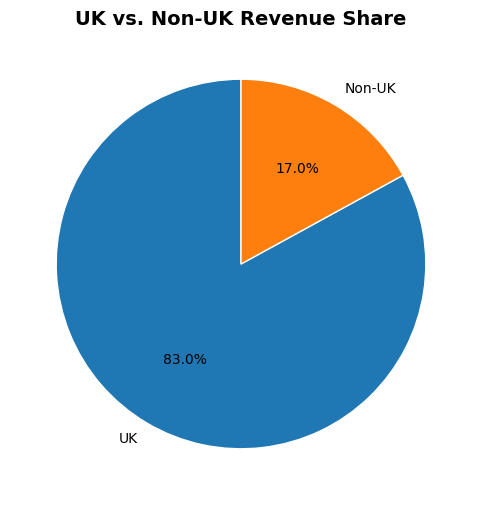

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---- Load dataset ----
df = pd.read_csv("online_retail_cleaned.csv")

# ---- Create Revenue column ----
df["Revenue"] = df["Quantity"] * df["Price"]

# ---- Group by Country and sum revenue ----
country_sales = df.groupby("Country", as_index=False)["Revenue"].sum()

# ---- 1. Top 10 countries by revenue ----
top10 = country_sales.sort_values(by="Revenue", ascending=False).head(10)

# ---- 2. UK vs Non-UK percentage ----
total_revenue = country_sales["Revenue"].sum()
uk_revenue = country_sales.loc[country_sales["Country"] == "United Kingdom", "Revenue"].sum()
non_uk_revenue = total_revenue - uk_revenue

uk_percentage = (uk_revenue / total_revenue) * 100
non_uk_percentage = (non_uk_revenue / total_revenue) * 100

print(f"UK Revenue %: {uk_percentage:.2f}%")
print(f"Non-UK Revenue %: {non_uk_percentage:.2f}%")

# ---- 3. Visualization: Top 10 Countries ----
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top10,
    x="Revenue",
    y="Country",
    palette="viridis"
)

plt.title("Top 10 Countries by Sales Revenue", fontsize=16, weight="bold")
plt.xlabel("Revenue", fontsize=12)
plt.ylabel("Country", fontsize=12)

# Annotate values on bars
for index, value in enumerate(top10["Revenue"]):
    plt.text(value + 0.02*total_revenue/10, index, f"${value:,.0f}", va="center")

plt.tight_layout()
plt.show()

# ---- 4. UK vs Non-UK Pie chart ----
plt.figure(figsize=(6, 6))
plt.pie(
    [uk_revenue, non_uk_revenue],
    labels=["UK", "Non-UK"],
    autopct="%1.1f%%",
    colors=["#1f77b4", "#ff7f0e"],
    startangle=90,
    wedgeprops={"edgecolor": "white"}
)
plt.title("UK vs. Non-UK Revenue Share", fontsize=14, weight="bold")
plt.show()
